In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wandb

In [2]:
WANDB_PROJECT = None

## Load data

In [3]:
from pathlib import Path
import os

data_dir = Path('./data/')
data_path = Path('./data/fashion_mnist.npz')

if data_path.is_file():
    print('Data found. Loading...')
    data = np.load(data_path)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
else:
    print('Data not found. Downloading...')
    if not data_dir.is_dir():
        os.mkdir(data_dir)
    from keras.datasets import fashion_mnist
    (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
    X_train, X_test = X_train/255., X_test/255.
    np.savez_compressed(data_path, X_train, Y_train, X_test, Y_test)

Data found. Loading...


In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
CLASS_LABELS = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

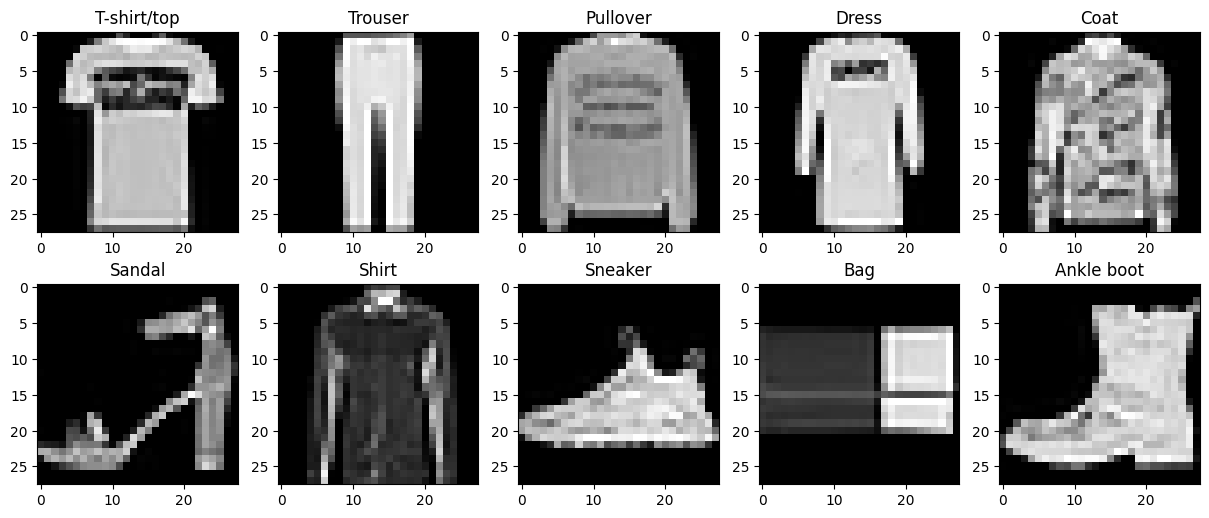

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    row_no = i//5
    col_no = i%5
    X_sub = X_train[Y_train==i]
    index = np.random.choice(a=range(len(X_sub)), size=1)
    ax[row_no][col_no].imshow(X_sub[index].reshape((28, 28)), cmap='gray')
    ax[row_no][col_no].set_title(CLASS_LABELS[i])
    if WANDB_PROJECT is not None:
        with wandb.init(project=WANDB_PROJECT):
            wandb.log({'examples': wandb.Image(X_sub[index].reshape(28, 28, 1), caption=CLASS_LABELS[i])})

## Trying model on data

In [7]:
from activations import *
from losses import *
from metrics import *
from nn import *
from optimizers import *
from learn import *

In [8]:
model = FeedForwardNeuralNetwork(1, 128, activation='sigmoid', weight_init='xavier')
optimizer = StochasticGradientDescent(model, lr=1e-2)
loss_fn = CrossEntropyLoss()
metric = categorical_accuracy

In [9]:
history = fit(
    model,
    X_train[:54000].reshape(-1, 784),
    Y_train[:54000],
    X_train[54000:].reshape(-1, 784),
    Y_train[54000:],
    optimizer,
    loss_fn,
    metric,
    batch_size=128
)

[Epoch 1/10] train loss: 1.864039, val loss:  1.517568 || train score: 0.527439, val score: 0.663167
[Epoch 2/10] train loss: 1.330974, val loss:  1.176551 || train score: 0.689367, val score: 0.714333
[Epoch 3/10] train loss: 1.090060, val loss:  1.001500 || train score: 0.717875, val score: 0.729833
[Epoch 4/10] train loss: 0.956016, val loss:  0.895637 || train score: 0.733314, val score: 0.742333
[Epoch 5/10] train loss: 0.870422, val loss:  0.825028 || train score: 0.743536, val score: 0.748667
[Epoch 6/10] train loss: 0.810904, val loss:  0.774602 || train score: 0.751016, val score: 0.754500
[Epoch 7/10] train loss: 0.766922, val loss:  0.736667 || train score: 0.756903, val score: 0.761333
[Epoch 8/10] train loss: 0.732875, val loss:  0.706923 || train score: 0.762602, val score: 0.765833
[Epoch 9/10] train loss: 0.705528, val loss:  0.682808 || train score: 0.767582, val score: 0.769833
[Epoch 10/10] train loss: 0.682904, val loss:  0.662716 || train score: 0.772395, val score

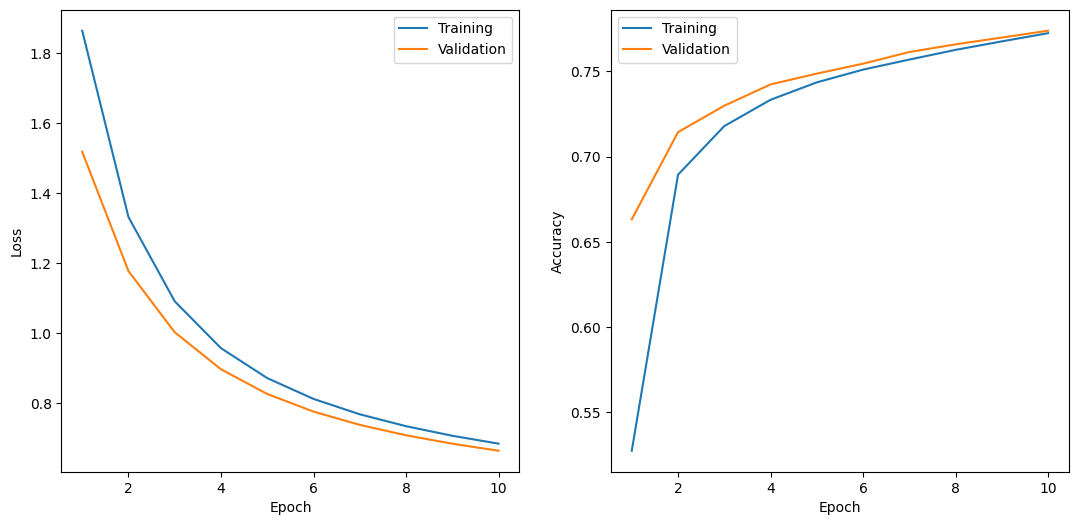

In [10]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.plot(history['epoch'], history['train_loss'], label='Training')
plt.plot(history['epoch'], history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history['epoch'], history['train_score'], label='Training')
plt.plot(history['epoch'], history['val_score'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()